## Dependencias do Projeto
## Imports

In [87]:
import cv2
import numpy as np
from math import exp
from timeit import default_timer
import matplotlib.pyplot as plt
from skimage.util.shape import view_as_windows

## Leitura da Imagem Base em formato PGM

In [97]:
img = cv2.imread('/home/andressa/Área de Trabalho/trabalho2_pdi/input/baboon.pgm',0) 
#orig = img.copy()

_________________________________________________________________________________________________________________

##  FUNÇÃO (apply_threshold)

### Função que obtem uma imagem binária com base em um determinado limite global ou um conjunto de limites locais.

#### Parametros passados para a Função: 


**1. img**: A imagem de entrada no formato .pgm
    * type(img): ndarray
    
**2. threshold**: Os limites globais ou locais correspondentes para cada pixel da imagem. Por padrão seu valor é 128.
    * type(threshold): Union[int, ndarray]

**3. wp_val**: O valor atribuído aos pixels do foreground(pixels brancos). 0 Equivale aos Pixels Pretos e 255 aos Pixels brancos.
    * type(wp_val): int

**4. neighbor**: Valor default da vizinhança.

**5. return da função**: Uma imagem binária.
    * return type: ndarray
    


In [89]:
def apply_threshold(img, threshold=128, wp_val=255, neighbor=9):
    return ((img >= threshold) * wp_val).astype(np.uint8)

(array([4.000e+00, 1.800e+01, 2.900e+01, 3.300e+01, 3.000e+01, 2.900e+01,
        2.800e+01, 2.700e+01, 3.700e+01, 3.400e+01, 5.400e+01, 3.800e+01,
        4.700e+01, 4.600e+01, 4.200e+01, 5.100e+01, 7.100e+01, 8.000e+01,
        8.500e+01, 8.800e+01, 9.200e+01, 9.700e+01, 9.100e+01, 1.010e+02,
        1.180e+02, 1.190e+02, 1.560e+02, 1.550e+02, 1.760e+02, 1.950e+02,
        1.980e+02, 2.100e+02, 2.350e+02, 2.440e+02, 2.830e+02, 2.730e+02,
        3.260e+02, 3.030e+02, 3.290e+02, 3.650e+02, 3.790e+02, 3.660e+02,
        3.890e+02, 4.880e+02, 4.760e+02, 4.970e+02, 5.570e+02, 5.530e+02,
        5.490e+02, 6.190e+02, 6.600e+02, 5.730e+02, 6.460e+02, 6.960e+02,
        6.920e+02, 6.940e+02, 7.350e+02, 7.690e+02, 7.910e+02, 8.420e+02,
        8.720e+02, 8.340e+02, 8.650e+02, 8.930e+02, 9.190e+02, 9.600e+02,
        9.180e+02, 9.460e+02, 9.850e+02, 9.370e+02, 9.830e+02, 1.070e+03,
        1.034e+03, 1.038e+03, 1.037e+03, 1.115e+03, 1.194e+03, 1.155e+03,
        1.211e+03, 1.188e+03, 1.191e+0

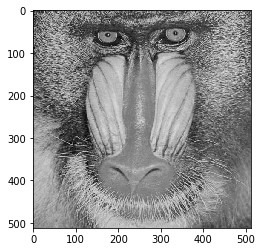

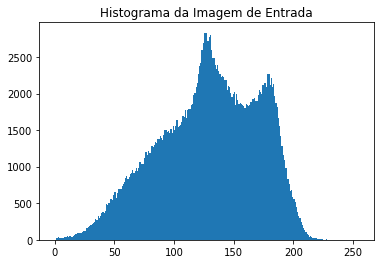

In [90]:
# Loading image if needed
if img is None:
    img = face(gray=True)

# Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')

# Plotting test image histogram
plt.figure('Histograma')
plt.title('Histograma da Imagem de Entrada')
plt.hist(img.ravel(), range=(0, 255), bins=255)

________________________________________________________________________________________________________________

## FUNÇÃO (otsu):

### Metodo Global Otsu


1. **@param1 image:** Imagem de Entrada
    
        @type image: ndarray
    

2. **@param2 hist:** Histograma da Imagem
    
        @type hist: ndarray


3. **@return:** Threshold de Otsu
    
        @rtype: int


In [91]:
def otsu_threshold(image=None, hist=None):
    
    if image is None and hist is None:
        raise ValueError('You must pass as a parameter either'
                         'the input image or its histogram')

    # Calculating histogram
    if not hist:
        hist = np.histogram(image, bins=range(256))[0].astype(np.float)

    cdf_backg = np.cumsum(np.arange(len(hist)) * hist)
    w_backg = np.cumsum(hist)  # The number of background pixels
    w_backg[w_backg == 0] = 1  # To avoid divisions by zero
    m_backg = cdf_backg / w_backg  # The means

    cdf_foreg = cdf_backg[-1] - cdf_backg
    w_foreg = w_backg[-1] - w_backg  # The number of foreground pixels
    w_foreg[w_foreg == 0] = 1  # To avoid divisions by zero
    m_foreg = cdf_foreg / w_foreg  # The means

    var_between_classes = w_backg * w_foreg * (m_backg - m_foreg) ** 2

    return np.argmax(var_between_classes)

### Plot Otsu Method Results

========Otsuuuu==========
Threshold: 122
Execution time: 0.013375217997236177
Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


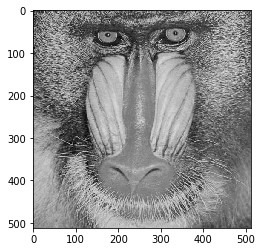

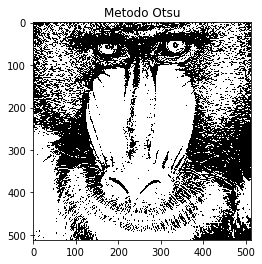

In [93]:
# Applying Otsu method
start = default_timer()
th = otsu_threshold(img)
stop = default_timer()
print('========Otsuuuu==========')
print('Threshold: {0}'.format(th))
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')

# Plotting results
plt.figure('Otsu method')
plt.title('Metodo Otsu')
plt.imshow(apply_threshold(img, th), cmap='gray')

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

________________________________________________________________________________________________________________

### FUNÇÃO (sauvola_threshold):


1. **@param1 img:** Imagem de Entrada
    
    @type img: ndarray


2. **@param2 w_size:** O tamanho da janela local para calcular cada limite de pixels. Deve ser um valor ímpar. Em suma será o kernel;

    @type w_size: int 


3. **@param3 k:** Controla o valor do limite local. Está no intervalo [0,2, 0,5] ...
    
    @type k: float
    

4. **@return:** O limite local estimado para cada pixel.
    
    @rtype: ndarray


In [98]:
def sauvola_threshold(img, w_size=15, k=0.2):
    
    # Obtaining rows and cols
    rows, cols = img.shape
    i_rows, i_cols = rows + 1, cols + 1

    # Computing integral images
    # Leaving first row and column in zero for convenience
    integ = np.zeros((i_rows, i_cols), np.float)
    sqr_integral = np.zeros((i_rows, i_cols), np.float)

    integ[1:, 1:] = np.cumsum(np.cumsum(img.astype(np.float), axis=0), axis=1)
    sqr_img = np.square(img.astype(np.float))
    sqr_integral[1:, 1:] = np.cumsum(np.cumsum(sqr_img, axis=0), axis=1)

    # Defining grid
    x, y = np.meshgrid(np.arange(1, i_cols), np.arange(1, i_rows))

    # Obtaining local coordinates
    hw_size = w_size // 2
    x1 = (x - hw_size).clip(1, cols)
    x2 = (x + hw_size).clip(1, cols)
    y1 = (y - hw_size).clip(1, rows)
    y2 = (y + hw_size).clip(1, rows)

    # Obtaining local areas size
    l_size = (y2 - y1 + 1) * (x2 - x1 + 1)

    # Computing sums
    sums = (integ[y2, x2] - integ[y2, x1 - 1] -
            integ[y1 - 1, x2] + integ[y1 - 1, x1 - 1])
    sqr_sums = (sqr_integral[y2, x2] - sqr_integral[y2, x1 - 1] -
                sqr_integral[y1 - 1, x2] + sqr_integral[y1 - 1, x1 - 1])

    # Computing local means
    means = sums / l_size

    # Computing local standard deviation
    stds = np.sqrt(sqr_sums / l_size - np.square(means))

    # Computing thresholds
    thresholds = means * (1.0 + k * (stds / 128 - 1.0))

    return thresholds


### Plot Sauvola Method Results

========Local Sauvola==========
Execution time: 0.05292540698428638


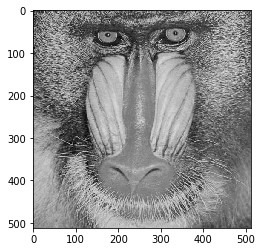

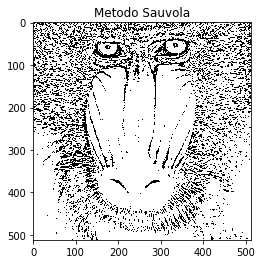

Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


In [108]:

# Applying local Sauvola method
start = default_timer()
th = sauvola_threshold(img)
stop = default_timer()
print('========Local Sauvola==========')
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')

# Plotting results
plt.figure('Local Sauvola method')
plt.title('Metodo Sauvola')
plt.imshow(apply_threshold(img, th), cmap='gray')
plt.show()

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

_______________________________________________________________________________________________________________

## FUNÇÃO (niblack_threshold):



1. **@param1 img:** Imagem de Entrada.

        @type img: ndarray


2. **@param2 w_size:** O tamanho da janela local para calcular cada limite de pixels. Deve ser valor ímpar.

        @type w_size: int 



3. **@param3 k:** Controla o valor do limite local. Deve estar no intervalo [-0,2, -0,1].
    
        @type k: float
    

4. **@return:** O limite local estimado para cada pixel.
        
        @rtype: ndarray


In [109]:
def niblack_threshold(img, w_size=15, k=-0.2):
    # Obtaining rows and cols
    rows, cols = img.shape
    i_rows, i_cols = rows + 1, cols + 1

    # Computing integral images
    # Leaving first row and column in zero for convenience
    integ = np.zeros((i_rows, i_cols), np.float)
    sqr_integral = np.zeros((i_rows, i_cols), np.float)

    integ[1:, 1:] = np.cumsum(np.cumsum(img.astype(np.float), axis=0), axis=1)
    sqr_img = np.square(img.astype(np.float))
    sqr_integral[1:, 1:] = np.cumsum(np.cumsum(sqr_img, axis=0), axis=1)

    # Defining grid
    x, y = np.meshgrid(np.arange(1, i_cols), np.arange(1, i_rows))

    # Obtaining local coordinates
    hw_size = w_size // 2
    x1 = (x - hw_size).clip(1, cols)
    x2 = (x + hw_size).clip(1, cols)
    y1 = (y - hw_size).clip(1, rows)
    y2 = (y + hw_size).clip(1, rows)

    # Obtaining local areas size
    l_size = (y2 - y1 + 1) * (x2 - x1 + 1)

    # Computing sums
    sums = (integ[y2, x2] - integ[y2, x1 - 1] -
            integ[y1 - 1, x2] + integ[y1 - 1, x1 - 1])
    sqr_sums = (sqr_integral[y2, x2] - sqr_integral[y2, x1 - 1] -
                sqr_integral[y1 - 1, x2] + sqr_integral[y1 - 1, x1 - 1])

    # Computing local means
    means = sums / l_size

    # Computing local standard deviation
    stds = np.sqrt(sqr_sums / l_size - np.square(means))

    # Computing thresholds
    thresholds = means + k * stds

    return thresholds


### Plot Niblack Method Results

========Local Niblack==========
Execution time: 0.05599022001842968
Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


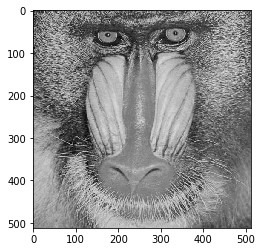

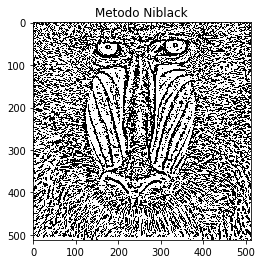

In [110]:
# Applying local Niblack method
start = default_timer()
th = niblack_threshold(img)
stop = default_timer()
print('========Local Niblack==========')
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')

# Plotting results
plt.figure('Local Niblack method')
plt.title('Metodo Niblack')
plt.imshow(apply_threshold(img, th), cmap='gray')

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

_________________________________________________________________________________________________________________

## FUNÇÃO (lmean_threshold):

1. **@param1 img:** The input image
        
        @type img: ndarray


2. **@param2 w_size:** The size of the local window to compute each pixel threshold. Should be and odd value
        
        @type w_size: int 



3. **@return:** The estimated local threshold for each pixel


        @rtype: ndarray
    
    


In [111]:
def lmean_threshold(img, w_size=15):
    # Obtaining rows and cols
    rows, cols = img.shape
    i_rows, i_cols = rows + 1, cols + 1

    # Computing integral image
    # Leaving first row and column in zero for convenience
    integ = np.zeros((i_rows, i_cols), np.float)

    integ[1:, 1:] = np.cumsum(np.cumsum(img.astype(np.float), axis=0), axis=1)

    # Defining grid
    x, y = np.meshgrid(np.arange(1, i_cols), np.arange(1, i_rows))

    # Obtaining local coordinates
    hw_size = w_size // 2
    x1 = (x - hw_size).clip(1, cols)
    x2 = (x + hw_size).clip(1, cols)
    y1 = (y - hw_size).clip(1, rows)
    y2 = (y + hw_size).clip(1, rows)

    # Obtaining local areas size
    l_size = (y2 - y1 + 1) * (x2 - x1 + 1)

    # Computing sums
    sums = (integ[y2, x2] - integ[y2, x1 - 1] -
            integ[y1 - 1, x2] + integ[y1 - 1, x1 - 1])

    # Computing local means
    means = sums / l_size

    return means


### Plot Mean Method Results

========Local mean==========
Execution time: 0.02938157698372379
Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


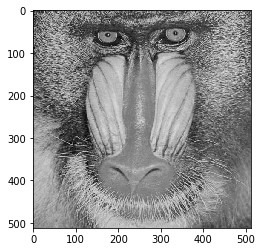

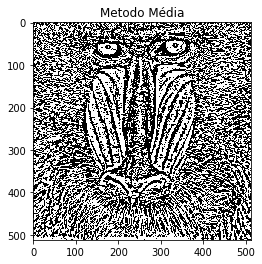

In [112]:
# Applying local mean method
start = default_timer()
th = lmean_threshold(img)
stop = default_timer()
print('========Local mean==========')
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')

# Plotting results
plt.figure('Local mean method')
plt.title('Metodo Média')
plt.imshow(apply_threshold(img, th), cmap='gray')    

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

_______________________________________________________________________________________________________________

## FUNÇÃO (bernsen_threshold):


1. **@param1 img:** The input image. Must be a gray scale image
        
        @type img: ndarray
    
    
    
2. **@param2 w_size:** The size of the local window to compute each pixel threshold. Should be an odd window.
        
        @type w_size: int
    
    
    
3. **@param3 c_thr:** The threshold contrast to determine an homogeneous region
    
       @type c_thr: int
    
    
    
    
4. **@return:** The estimated local threshold for each pixel
    
    
        @rtype: ndarray

In [113]:
def bernsen_threshold(img, w_size=15, c_thr=30):
    
    thresholds = np.zeros(img.shape, np.uint8)

    # Obtaining windows
    hw_size = w_size // 2
    padded_img = np.ones((img.shape[0] + w_size - 1,
                          img.shape[1] + w_size - 1)) * np.nan
    padded_img[hw_size: -hw_size,
               hw_size: -hw_size] = img

    winds = view_as_windows(padded_img, (w_size, w_size))

    mins = np.nanmin(winds, axis=(2, 3))
    maxs = np.nanmax(winds, axis=(2, 3))

    # Calculating contrast and mid values
    contrast = maxs - mins
    mid_vals = (maxs + mins) / 2

    thresholds[contrast <= c_thr] = 128
    thresholds[contrast > c_thr] = mid_vals[contrast > c_thr]

    return thresholds


### Plot Bernsen Method Results

========Local Bernsen==========
Execution time: 0.27870755598996766
Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


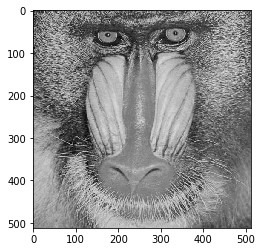

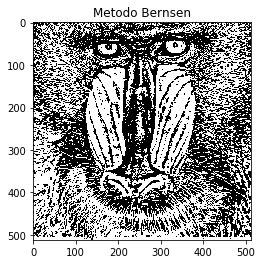

In [114]:
# Applying local Bernsen method
start = default_timer()
th = bernsen_threshold(img)
stop = default_timer()
print('========Local Bernsen==========')
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')

# Plotting results
plt.figure('Local Bernsen method')
plt.title('Metodo Bernsen')
plt.imshow(apply_threshold(img, th), cmap='gray')

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

________________________________________________________________________________________________________________

## FUNÇÃO (contrast_threshold):

**@param1 img:** The input image. Must be a gray scale image

        @type img: ndarray


**@param2 w_size:** The size of the local window to compute each pixel threshold. Should be an odd window.

        @type w_size: int


**@return:** The estimated local threshold for each pixel

        @rtype: ndarray

In [115]:
def contrast_threshold(img, w_size=15):
    
    thresholds = np.zeros(img.shape)

    # Obtaining windows
    hw_size = w_size // 2
    padded_img = np.ones((img.shape[0] + w_size - 1,
                          img.shape[1] + w_size - 1)) * np.nan
    padded_img[hw_size: -hw_size, hw_size: -hw_size] = img

    winds = view_as_windows(padded_img, (w_size, w_size))

    # Obtaining maximums and minimums
    mins = np.nanmin(winds, axis=(2, 3))
    maxs = np.nanmax(winds, axis=(2, 3))

    min_dif = img - mins
    max_dif = maxs - img

    thresholds[min_dif <= max_dif] = 256
    thresholds[min_dif > max_dif] = 0

    return thresholds


## Plot Contrast Method Result:

========Local contrast==========
Execution time: 0.27732080200803466
Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


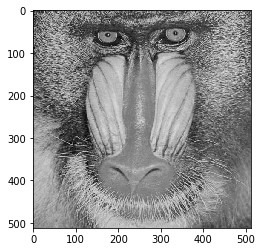

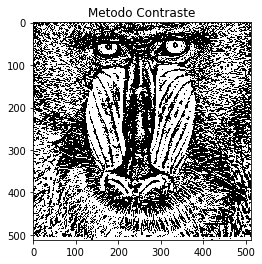

In [116]:
# Applying local contrast method
start = default_timer()
th = contrast_threshold(img)
stop = default_timer()
print('========Local contrast==========')
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')

# Plotting results
plt.figure('Local contrast method')
plt.title('Metodo Contraste')
plt.imshow(apply_threshold(img, th), cmap='gray')

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

_________________________________________________________________________________________________________________

### Local thresholding method building on Sauvola/Pietaksinen.
### Deals with low contrast images.
### k, R, p, q are adjustment parameters. Suggested k=0,25, R=0,5, p=2 and q=10.
### R is different from Sauvola because it uses normalized intensity.

## Font: https://imagej.net/Auto_Local_Threshold#Phansalkar


## Função Phansalskar, Sabale e More

Esta é uma modificação do método de limiar de Sauvola para lidar com imagens de baixo contraste.

Phansalskar, N; Mais, S & Sabale, A et al. (2011), " Limiar local adaptativo para detecção de núcleos em imagens citológicas manchadas de diversidade. ", Conferência Internacional sobre Comunicações e Processamento de Sinais (ICCSP) : 218-220, doi: 10.1109 / ICCSP.2011.5739305
Nesse método, o limite t é calculado como:


**t = média * (1 + p * exp (-q * média) + k * ((stdev / r) - 1))**


onde média e stdev são a média local e o desvio padrão, respectivamente. 

**Phansalkar recomenda k = 0,25, r = 0,5, p = 2 e q = 10.**

k e r são os parâmetros 1 e 2 respectivamente, mas os valores de p e q são fixos.

1. **Parâmetro 1 : é o valor k . O valor padrão é 0,25. Qualquer outro número que não 0 alterará seu valor.**

2. **Parâmetro 2 : é o valor r . O valor padrão é 0,5. Este valor é diferente do de Sauvola porque usa a intensidade normalizada da imagem. Qualquer outro número que não 0 alterará seu valor.**

In [117]:
# thresholds = mean * (1.0 + p * exp(-1*q*mean) + k * (np.std(w_size) / 128 - 1.0))

def phansalskar_more_sabale(w_size=15,k=0.2, p=2.0, q=10.0):
    mean = np.mean(w_size)
    return mean * (1 + p * exp(-1*q*mean) + k * (np.std(w_size)/128 - 1))

========Local phansalkar==========
Execution time: 0.00231788499513641
Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


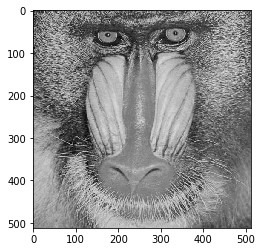

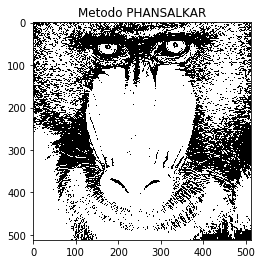

In [118]:
# Applying local contrast method
start = default_timer()
th = phansalskar_more_sabale(img)
stop = default_timer()
print('========Local phansalkar==========')
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')
    
# Plotting results
plt.figure('Local  PHANSALKAR method')
plt.title('Metodo PHANSALKAR')
plt.imshow(apply_threshold(img, th), cmap='gray')

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

______________________________________________________________________________________________________

##  Função median

### Metodo Mediana

In [119]:
def lmedian_threshold(img, w_size=15):
    # Obtaining rows and cols
    rows, cols = img.shape
    i_rows, i_cols = rows + 1, cols + 1

    # Computing integral image
    # Leaving first row and column in zero for convenience
    integ = np.zeros((i_rows, i_cols), np.float)

    integ[1:, 1:] = np.cumsum(np.cumsum(img.astype(np.float), axis=0), axis=1)

    # Defining grid
    x, y = np.meshgrid(np.arange(1, i_cols), np.arange(1, i_rows))

    # Obtaining local coordinates
    hw_size = w_size // 2
    x1 = (x - hw_size).clip(1, cols)
    x2 = (x + hw_size).clip(1, cols)
    y1 = (y - hw_size).clip(1, rows)
    y2 = (y + hw_size).clip(1, rows)

    # Obtaining local areas size
    l_size = (y2 - y1 + 1) * (x2 - x1 + 1)

    # Computing sums
    sums = (integ[y2, x2] - integ[y2, x1 - 1] - integ[y1 - 1, x2] + integ[y1 - 1, x1 - 1])

    # Computing local means
    means = sums / l_size
    median = np.median(means)
    
    return median


### Plot Median

========Local median==========
Execution time: 0.04416273901006207
Total de pixels:  262144
Pixels brancos:  0.9999847412109375
Pixels pretos:  1.52587890625e-05


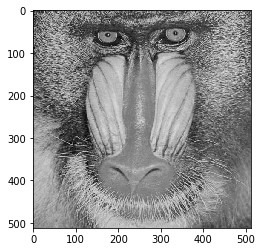

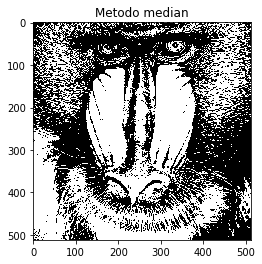

In [120]:
# Applying local contrast method
start = default_timer()
th = lmedian_threshold(img)
stop = default_timer()
print('========Local median==========')
print('Execution time: {0}'.format(stop - start))
print('====================================')

#Plotting test image
plt.figure('Imagem Original')
plt.imshow(img, cmap='gray')
    
# Plotting results
plt.figure('Local median method')
plt.title('Metodo median')
plt.imshow(apply_threshold(img, th), cmap='gray')

# Fractions pixels
total = img.size
white = np.count_nonzero(img)
black = total - white
print("Total de pixels: ", total)
print('==========================================')
#print("Fraction of white pixels: ", white)
print("Pixels brancos: ", white/total)
print('==========================================')
#print("Fraction of black pixels: ", black)
print("Pixels pretos: ", black/total)

______________________________________________________________________________________________________________